<a href="https://colab.research.google.com/github/rafaelmgr12/ds-projects/blob/main/Tabular-Playground/AutoML_SEP_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabular Playground Series - Sep 2021
Practice your ML skills on this approachable dataset!

## Setup  Colab

In [ ]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
  from google.colab import files
  files.upload()
  ! mkdir ~/.kaggle
  ! wget https://raw.githubusercontent.com/rafaelmgr12/ds-projects/main/functions/ml_functions.py -O ml_functions.py
  ! wget https://raw.githubusercontent.com/rafaelmgr12/ds-projects/main/functions/plots_functions.py -O plot_functions.py
  ! pip install sentencepiece
  ! pip install optuna
  ! pip install pycaret[full]
  ! pip install unidecode
  ! pip install catboost
  ! pip install category-encoders
  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json
  ! kaggle competitions download -c tabular-playground-series-sep-2021
  ! unzip test.csv.zip && unzip train.csv.zip && unzip sample_solution.csv.zip


Saving kaggle.json to kaggle.json
--2021-09-10 16:20:07--  https://raw.githubusercontent.com/rafaelmgr12/ds-projects/main/functions/ml_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6651 (6.5K) [text/plain]
Saving to: ‘ml_functions.py’

ml_functions.py     100%[===================>]   6.50K  --.-KB/s    in 0s      

2021-09-10 16:20:08 (74.1 MB/s) - ‘ml_functions.py’ saved [6651/6651]

--2021-09-10 16:20:08--  https://raw.githubusercontent.com/rafaelmgr12/ds-projects/main/functions/plots_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

     |████████████████████████████████| 235 kB 4.1 MB/s 
     |████████████████████████████████| 80 kB 3.7 MB/s 
100% 393M/394M [00:09<00:00, 46.8MB/s]
100% 394M/394M [00:09<00:00, 41.9MB/s]
  0% 0.00/1.10M [00:00<?, ?B/s]
100% 1.10M/1.10M [00:00<00:00, 74.9MB/s]
 97% 196M/203M [00:04<00:00, 52.7MB/s]
100% 203M/203M [00:04<00:00, 50.3MB/s]
Archive:  test.csv.zip
  inflating: test.csv                
Archive:  train.csv.zip
  inflating: train.csv               
Archive:  sample_solution.csv.zip
  inflating: sample_solution.csv     


## Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# ml agorthims
from pycaret.classification import *


/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


Read data

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118,claim
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,86.489,0.59881,1.423200e+09,0.27240,9.455600,-0.050305,1938.300,8.6331,4.0607,26.8670,-1.180,10961.00,1.5397,135.3200,-1.49650,440.080,2.590100e+12,2.194200e+09,2968800.0,0.001431,13.3270,0.75050,18509.0,146820.0,-0.000276,1.090600e+16,1705.400,414.29,3.5392,1888.0,0.968930,18.3880,-0.001583,7.7059,5.9325,0.025693,4.5604,0.61122,10.7950,0.341930,0.235010,NaN,5237.70,1.29610,163.66,0.403780,0.188600,-0.001446,-0.35416,6.6432,0.30534,0.514020,1.907300e+09,29.861,0.965010,1797.2,72.178,108.6200,1.9799,1.2907,0.99519,1.3228,827.340,7.779900e+14,4.129900e+10,0.006994,6.9835,43956.0,1978.2,5.5084,-0.001081,6.1244,1.231800e+11,275.9200,5308500.0,1704.000,5.022400e+10,53.3980,-2.2012,6871.0,3.8862,-0.00558,5252.100,166.690,1.60740,0.66534,7768.900,0.99662,1.125700e+11,2.2432,0.934160,0.65056,94569.0,21.471,8214.100,0.288010,0.097826,0.001071,1.412400e+09,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,9953.600,1.20930,3.334100e+09,0.28631,-0.012858,-0.019912,10.284,6.1872,1.0419,4.6404,31.877,123620.00,1.3951,125.8100,1.19890,136.450,9.098100e+09,4.004100e+10,1564000.0,0.000204,3.1074,1.50330,238000.0,21440.0,-0.001344,3.079400e+16,229.100,844.82,1.4680,4726.5,0.915380,-1.5321,0.982600,7.1112,2.0797,0.042321,4.2523,0.41871,5.4499,0.012737,0.386470,7.3082,283.21,-0.92552,140.80,0.247390,-0.001656,-0.000975,-0.22629,2.4246,0.77147,0.011613,1.803700e+09,64.604,0.262650,4455.0,78.339,745.5100,2.9069,1.4826,1.00510,1.4974,84.446,3.505600e+15,2.242300e+09,0.896300,4.6749,17713.0,9003.1,-4.3546,0.254100,6.9191,1.832400e+11,9.6510,32800.0,1480.600,2.300600e+10,44.0510,205.6900,4295.3,13.3880,0.46843,754.610,83.233,1.18900,29.55000,7343.700,0.99815,4.877700e+13,1.2708,-0.000969,5.29520,6779.0,227.720,34.342,0.340300,0.143370,0.049276,1.903200e+09,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,15827.000,0.38164,1.230300e+09,0.25807,2.455600,NaN,26.873,7.5463,1.9967,1.9526,817.760,-2948.70,2.0054,1.6826,1.19680,74.624,-3.273900e+10,5.718900e+10,11058.0,-0.003097,8.0241,1.13180,27940.0,862460.0,-0.002207,5.849100e+13,-897.840,NaN,1.3561,3063.4,0.086232,16.1060,0.001481,11.4760,5.3430,0.012162,4.1018,-0.88270,8.1228,-0.676690,0.337700,-1.0732,4097.00,13.45800,159.24,0.322300,0.560090,0.000455,-0.16083,3.5753,0.60970,0.028301,5.271300e+08,14.454,0.115490,14605.0,36.992,-9.6391,64.2670,NaN,0.99278,2.5891,430.400,-4.453500e+13,5.144900e+12,0.099591,6.5516,1887.5,43319.0,4.3931,0.260260,6.1052,1.013300e+11,357.2700,1476600.0,90.845,1.306200e+09,2.3731,391.3700,2965.3,NaN,0.49459,43.524,138.520,1.10790,0.91948,47.915,NaN,1.510500e+12,3.4663,0.560950,4.13090,95531.0,39.486,-83.148,0.084881,0.032222,0.001668,1.436500e+07,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,1
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,-36.837,1.10960,1.223100e+09,0.30944,10.370000,-0.106260,533.840,7.8490,1.0379,8.0030,12.349,-195.28,2.5598,92.1420,0.63789,1054.900,-1.204100e+10,5.187300e+12,1475400.0,1.036500,1.1903,0.98941,301200.0,NaN,-0.000007,-9.299200e+13,-10.818,1020.30,2.9553,3342.5,-0.000372,17.0110,0.095268,5.7448,15.8830,0.037934,4.4860,-0.88909,8.4384,-1.189800,0.001391,NaN,175.81,67.

In [ ]:
test_df.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44,f45,f46,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56,f57,f58,f59,f60,f61,f62,f63,f64,f65,f66,f67,f68,f69,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79,f80,f81,f82,f83,f84,f85,f86,f87,f88,f89,f90,f91,f92,f93,f94,f95,f96,f97,f98,f99,f100,f101,f102,f103,f104,f105,f106,f107,f108,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,957919,0.165850,0.487050,1295.00,0.02310,0.31900,0.90188,573.29,3743.7,2.705700e+12,6221.000,1.17200,5.175000e+09,0.25831,3.42050,0.044983,1001.600,10.1040,10.5360,19.517,-1.1209,1577.60,2.18470,96.109,1.1535,95.865,2.847100e+12,9.642100e+10,6406000.0,0.002990,6.6353,-0.015913,21723.0,67604.0,-0.000227,6.046200e+16,203.580,301.790,1.3461,5524.60,-0.003163,21.8830,0.027383,7.2113,24.82500,-0.001420,4.8950,-1.087100,7.0561,-1.061500,0.00010,1.85600,449.99,-0.36286,160.63,0.24801,0.62300,0.000116,-0.39384,1.9038,0.068588,0.020439,2.506500e+09,48.1640,-0.002272,78643.0,112.3600,1021.900,11.481,1.1573,0.002995,1.8192,1096.80,3.004100e+14,2.042300e+09,0.085500,4.6312,1683.10,9833.6,NaN,0.510410,4.0322,2.477900e+11,69.2640,5494800.0,1239.00,5.349300e+08,5.3086,182.590,829.17,5.2319,0.010301,3640.800,112.120,-0.43442,11.16100,3755.700,0.99926,5.338200e+10,1.3867,-0.001878,58.7940,75657.0,187.240,1258.90,0.163340,0.055398,0.020002,7.956400e+08,0.16253,-22.1890,2.0655,0.430880,-10.7410,81606.0,1.1940,1.980400e+14,2017.1,0.46357
1,957920,0.129650,0.373480,1763.00,0.72884,0.33247,-1.26310,875.55,554370.0,5.955700e+14,934.430,1.89790,4.905100e+09,0.28471,2.13870,-0.034328,35.223,6.5873,12.7340,29.590,4.1639,31915.00,3.11580,109.430,-0.8522,991.370,4.700100e+09,1.618200e+12,967810.0,1.021500,2.9617,0.810310,415570.0,384720.0,0.002243,6.712900e+15,228.590,33.952,1.4938,2067.50,-0.002343,32.7720,0.092283,6.5363,2.07730,0.046237,4.4590,-0.840920,4.4473,-1.001200,0.00375,99.64700,8146.80,22.50400,153.40,0.43076,0.74301,-0.000047,-0.11692,1.6544,0.467440,0.129650,4.442800e+08,38.5060,0.396220,74296.0,93.6290,-15.691,30.655,1.2311,1.004400,2.2484,780.87,1.213600e+14,3.488200e+11,-0.000792,6.9993,2451.60,10483.0,-5.3544,0.067286,5.4044,2.462600e+11,810.3000,860670.0,2165.20,2.711500e+08,10.2320,515.410,262.71,5.6357,0.374220,420.160,116.230,1.26980,0.78619,1207.000,1.00070,2.065000e+13,1.2888,0.248850,9.9857,16323.0,244.460,647.58,0.253820,0.008800,0.018479,1.120600e+08,0.81528,-1.6342,1.5736,-1.071200,11.8320,90114.0,1.1507,4.388000e+16,6638.9,0.28125
2,957921,0.120190,0.445210,736.26,0.04615,0.29605,0.31665,2659.50,317140.0,3.977800e+14,131.810,-0.48404,3.800000e+06,0.37173,0.40245,0.015119,1991.600,6.0050,0.9919,11.949,888.0700,887.70,3.52370,108.140,-1.6542,528.140,2.463600e+12,9.005900e+09,7259.3,1.007400,2.6123,1.062500,-208010.0,65708.0,0.001391,8.129800e+13,-84.032,NaN,1.7556,4729.20,0.003527,861.6600,0.902670,9.3934,58.78500,0.007244,5.6645,-0.627470,6.5806,-1.128200,0.38650,56.54700,125.36,12.70300,147.38,0.41437,0.51998,0.000857,-0.12065,5.4115,0.772530,0.128850,5.664900e+09,50.8940,0.378710,80045.0,65.2240,780.210,14.125,1.1657,-0.001285,1.0663,432.01,-5.953100e+11,1.383400e+12,-0.006236,5.6052,866.39,1065.2,-1.4805,0.064203,3.0197,1.684400e+11,212.8300,7891000.0,277.16,4.047900e+10,1.1170,393.510,8859.10,8.8098,0.405350,393.650,305.140,1.32660,30.85200,2803.700,0.99925,4.722600e+12,1.5003,0.493380,37.0470,139070.0,2464.000,4724.80,0.299160,0.093046,0.018516,6.519300e+07,0.81831,-32.7800,2.1364,-1.931200,-3.2804,37739.0,1.1548,1.718100e+14,5844.0,0.13797
3,957922,0.054008,0.395960,996.14,0.85934,0.36678,-0.17060,386.56,325680.0,-3.432200e+13,-26.473,-2.12930,4.675400e+09,0.26659,1.09680,-0.083571,1987.500,6.8989,11.1230,23.164,133.5700,-815.32,2.72950,82.011,3.8374,304.570,-1.315900e+10,-8.324500e+09,2297700.0,0.099522,4.9249,0.659900,48773.0,199560.0,-0.000621,3.993800e+16,1400.400,503.660,1.9131,2811.60,0.002362,278.2000,0.989190,7.4646,33.62400,0.025889,

Check for null Values

In [ ]:
train_df.isnull().sum()

id           0
f1       15247
f2       15190
f3       15491
f4       15560
f5       15405
f6       15521
f7       15504
f8       15373
f9       15249
f10      15223
f11      15425
f12      15593
f13      15464
f14      15222
f15      15509
f16      15444
f17      15427
f18      15325
f19      15474
f20      15455
f21      15454
f22      15278
f23      15356
f24      15630
f25      15506
f26      15358
f27      15444
f28      15265
f29      15415
f30      15392
f31      15678
f32      15529
f33      15492
f34      15248
f35      15334
f36      15363
f37      15312
f38      15434
f39      15559
f40      15368
f41      15396
f42      15416
f43      15455
f44      15463
f45      15483
f46      15633
f47      15523
f48      15446
f49      15380
f50      15562
f51      15432
f52      15315
f53      15462
f54      15425
f55      15422
f56      15467
f57      15573
f58      15455
f59      15400
f60      15560
f61      15431
f62      15518
f63      15410
f64      15578
f65      15414
f66      1

In [ ]:
test_df.isnull().sum()

id         0
f1      7812
f2      7891
f3      7795
f4      7733
f5      7877
f6      7913
f7      7933
f8      7855
f9      7818
f10     7896
f11     7921
f12     8087
f13     7931
f14     7750
f15     8040
f16     7940
f17     7985
f18     8005
f19     7988
f20     7820
f21     8001
f22     7893
f23     7908
f24     7764
f25     7879
f26     8120
f27     7963
f28     7952
f29     7944
f30     7908
f31     7834
f32     7861
f33     7809
f34     7917
f35     7903
f36     7983
f37     7985
f38     7867
f39     7977
f40     8046
f41     7895
f42     7961
f43     7934
f44     7797
f45     7994
f46     8011
f47     7936
f48     8019
f49     8044
f50     8001
f51     8021
f52     7778
f53     7956
f54     8034
f55     8034
f56     8045
f57     7845
f58     7828
f59     7885
f60     8053
f61     7945
f62     7955
f63     7925
f64     8141
f65     7902
f66     7994
f67     7955
f68     8080
f69     7945
f70     7901
f71     8025
f72     8019
f73     7885
f74     7964
f75     8094
f76     7892

Check for Imbalanced datasets

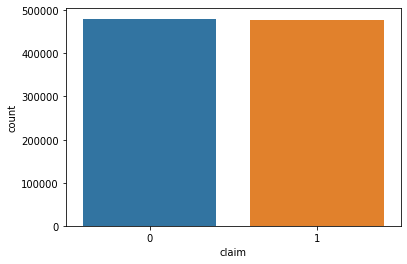

In [ ]:
sns.countplot(train_df['claim'])

## Auto ML

In [ ]:
exp_tab = setup(data = train_df.drop("id",axis = 1), target = 'claim', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  normalize_method = 'robust',
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95,
                  log_experiment = True, experiment_name = 'tab1',numeric_imputation = "mean",
                  use_gpu = True, pca = False)

,Description,Value
0,session_id,123
1,Target,claim
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(957919, 119)"
5,Missing Values,True
6,Numeric Features,118
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
from sklearn.metrics import log_loss
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target='pred_proba')

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f5c5f1710e0>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [ ]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.7009,0.7627,0.6075,0.7453,0.6693,0.4014,0.4084,0.6288
1,0.7003,0.7593,0.6101,0.7427,0.6699,0.4003,0.4068,0.6295
2,0.6977,0.7605,0.6052,0.7409,0.6662,0.3951,0.4018,0.6293
3,0.6988,0.7596,0.6072,0.7417,0.6677,0.3973,0.4040,0.6294
4,0.7022,0.7621,0.6097,0.7462,0.6711,0.4039,0.4108,0.6289
5,0.6979,0.7573,0.6078,0.7397,0.6673,0.3955,0.4019,0.6304
6,0.7002,0.7603,0.6121,0.7412,0.6705,0.4000,0.4062,0.6296
7,0.6979,0.7582,0.6069,0.7402,0.6670,0.3955,0.4020,0.6302
8,0.6944,0.7564,0.6006,0.7376,0.6621,0.3885,0.3954,0.6307
9,0.7016,0.7627,0.6125,0.7437,0.6717,0.4029,0.4093,0.6290


In [ ]:
xgboost = create_model('xgboost',)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.7177,0.7759,0.6499,0.7503,0.6965,0.4352,0.4391,0.5941
1,0.7150,0.7723,0.6496,0.7457,0.6943,0.4297,0.4333,0.5962
2,0.7158,0.7720,0.6471,0.7485,0.6942,0.4313,0.4353,0.5956
3,0.7162,0.7737,0.6492,0.7480,0.6951,0.4321,0.4359,0.5958
4,0.7182,0.7754,0.6501,0.7509,0.6969,0.4361,0.4400,0.5944
5,0.7136,0.7713,0.6456,0.7456,0.6920,0.4269,0.4307,0.5969
6,0.7151,0.7724,0.6495,0.7461,0.6944,0.4300,0.4336,0.5969
7,0.7145,0.7713,0.6478,0.7459,0.6934,0.4287,0.4324,0.5966
8,0.7145,0.7711,0.6476,0.7460,0.6934,0.4288,0.4325,0.5978
9,0.7158,0.7746,0.6473,0.7485,0.6942,0.4313,0.4353,0.5956


In [ ]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6837,0.7417,0.6225,0.7076,0.6623,0.3671,0.3698,0.6329
1,0.6826,0.7406,0.6206,0.7069,0.6609,0.3650,0.3677,0.6333
2,0.6833,0.7428,0.6177,0.7093,0.6603,0.3663,0.3693,0.6324
3,0.6812,0.7379,0.6220,0.7039,0.6604,0.3621,0.3646,0.6345
4,0.6831,0.7392,0.6214,0.7072,0.6615,0.3660,0.3687,0.6342
5,0.6810,0.7383,0.6194,0.7048,0.6593,0.3618,0.3644,0.6345
6,0.6811,0.7379,0.6216,0.7039,0.6602,0.3619,0.3644,0.6346
7,0.6803,0.7392,0.6196,0.7036,0.6589,0.3604,0.3630,0.6339
8,0.6815,0.7384,0.6216,0.7045,0.6605,0.3627,0.3652,0.6341
9,0.6816,0.7396,0.6222,0.7045,0.6608,0.3630,0.3655,0.6343


In [ ]:
#ada = create_model('ada')
lr = create_model('lr')
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.5425,0.5580,0.5688,0.5389,0.5534,0.0851,0.0853,0.6889
1,0.5442,0.5615,0.5716,0.5404,0.5555,0.0885,0.0886,0.6893
2,0.5425,0.5567,0.5744,0.5385,0.5558,0.0852,0.0854,0.6900
3,0.5428,0.5589,0.5708,0.5390,0.5544,0.0857,0.0858,0.6897
4,0.5442,0.5626,0.5747,0.5402,0.5569,0.0887,0.0889,0.6894
5,0.5408,0.5584,0.5677,0.5372,0.5520,0.0818,0.0819,0.6898
6,0.5411,0.5599,0.5700,0.5374,0.5532,0.0824,0.0825,0.6889
7,0.5404,0.5555,0.5721,0.5365,0.5537,0.0810,0.0812,0.6899
8,0.5381,0.5541,0.5697,0.5344,0.5515,0.0764,0.0766,0.6910
9,0.5445,0.5616,0.5708,0.5408,0.5554,0.0892,0.0893,0.6889


In [ ]:
tunned_lgbm = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.7225,0.7840,0.6616,0.7519,0.7039,0.4448,0.4481,0.5893
1,0.7198,0.7818,0.6593,0.7485,0.7011,0.4394,0.4425,0.5907
2,0.7209,0.7809,0.6588,0.7507,0.7018,0.4416,0.4449,0.5911
3,0.7192,0.7812,0.6599,0.7471,0.7008,0.4382,0.4412,0.5916
4,0.7203,0.7822,0.6566,0.7509,0.7006,0.4403,0.4438,0.5908
5,0.7191,0.7804,0.6572,0.7485,0.6999,0.4380,0.4413,0.5922
6,0.7189,0.7805,0.6581,0.7478,0.7001,0.4377,0.4408,0.5924
7,0.7186,0.7795,0.6587,0.7469,0.7000,0.4370,0.4401,0.5921
8,0.7168,0.7793,0.6542,0.7463,0.6972,0.4333,0.4367,0.5929
9,0.7212,0.7812,0.6607,0.7501,0.7025,0.4421,0.4452,0.5918


In [ ]:
stack_soft2 = stack_models([cat,lr,nb,xgboost], meta_model=tunned_lgbm,
                           method = 'auto',
                           choose_better = True,fold = 10 )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.7436,0.7877,0.7738,0.7286,0.7505,0.4873,0.4882,0.5498
1,0.7401,0.7847,0.7721,0.7245,0.7476,0.4803,0.4813,0.5529
2,0.7403,0.7833,0.7693,0.7259,0.7470,0.4806,0.4815,0.5543
3,0.7417,0.7840,0.7749,0.7255,0.7494,0.4835,0.4847,0.5529
4,0.7419,0.7851,0.7733,0.7265,0.7491,0.4839,0.4849,0.5526
5,0.7386,0.7820,0.7715,0.7227,0.7463,0.4774,0.4784,0.5556
6,0.7410,0.7843,0.7752,0.7244,0.7490,0.4821,0.4833,0.5529
7,0.7381,0.7829,0.7706,0.7224,0.7457,0.4763,0.4773,0.5548
8,0.7404,0.7828,0.7735,0.7243,0.7481,0.4809,0.4820,0.5545
9,0.7422,0.7860,0.7755,0.7260,0.7499,0.4846,0.4857,0.5513


In [ ]:
final_stack = finalize_model(stack_soft2)


[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 

In [ ]:
save_model(final_stack,'Final Stack Model 10Sep2021')


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='claim',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strate...
                                                                    importance_type='split',
                                                                    learning_rate=0.1,
                                                                    max_depth=-1,
            

In [ ]:
prep_pipe = get_config('prep_pipe')
prep_pipe.steps.append(['trained_model', final_stack])


In [ ]:
pred = prep_pipe.predict_proba(test_df) 

In [ ]:
pred

array([[0.7409892 , 0.2590108 ],
       [0.78615824, 0.21384176],
       [0.4839521 , 0.5160479 ],
       ...,
       [0.24034449, 0.75965551],
       [0.82839857, 0.17160143],
       [0.28631619, 0.71368381]])

In [ ]:
#unseen_predictions = predict_model(final_stack, data=test_df.drop("id",axis = 1))
#unseen_predictions.head()

## Submit 

In [ ]:
sub_df = pd.DataFrame({"id":test_df["id"].values})
sub_df["claim"] = pred[:,1]
sub_df.to_csv("submission.csv", index=False)

In [ ]:
! kaggle competitions submit -c tabular-playground-series-sep-2021 -f submission.csv -m "AUTO-ML 4"

100% 12.8M/12.8M [00:09<00:00, 1.43MB/s]
Successfully submitted to Tabular Playground Series - Sep 2021